In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


In [6]:
job_family = pd.read_csv('job_family.csv')
geography = pd.read_csv('geography.csv')
industry = pd.read_csv('industry.csv')
job_family_role = pd.read_csv('job_family_role.csv')
geography_industry = pd.read_csv('geography_industry.csv')
industry_job_family = pd.read_csv('industry_job_family.csv')
overall  = pd.read_csv('overall.csv')

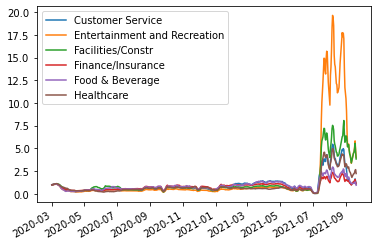

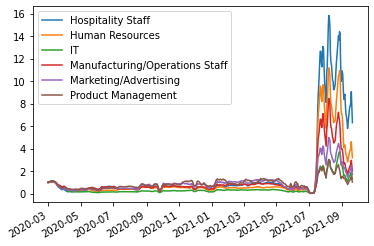

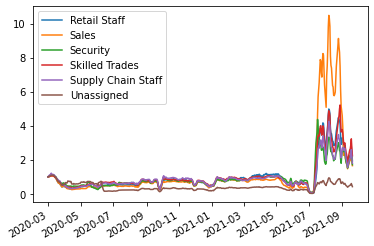

In [70]:
job_family = job_family.dropna(how='any',axis=0) 
job_family['post_date'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in job_family['post_date']]

i, j = 0,0
for jf in job_family['job_family'].unique():
    #print(jf)
    #print(jf == '')
    filtered_df = job_family[job_family['job_family']==jf]
    #print(filtered_df.head())
    
    plt.plot(filtered_df['post_date'],filtered_df['count_id_indexed'], label = jf)
    
    #ax[i][j].plot(filtered_df['post_date'],filtered_df['count_id_indexed'], label = jf)
    j += 1
    if j >= 6:
        
        plt.legend()
        plt.gcf().autofmt_xdate()
        plt.show()
        i +=1
        j = 0

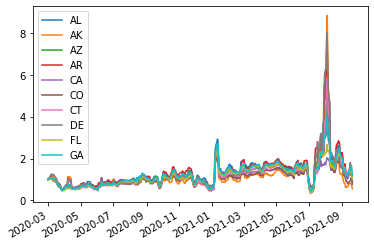

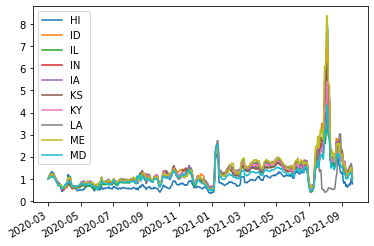

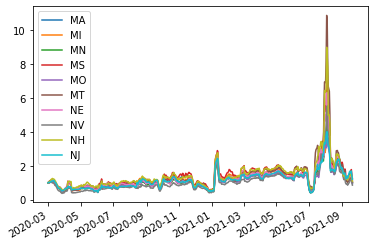

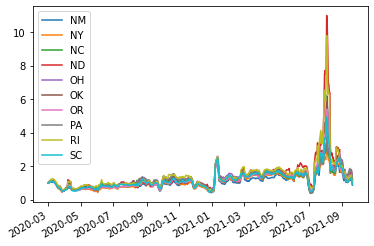

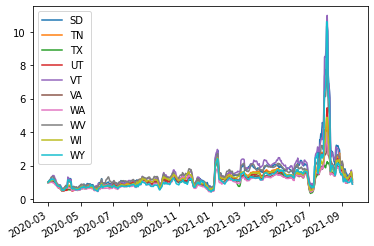

In [90]:
geography = geography.dropna(how='any',axis=0) 
geography['post_date'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in geography['post_date']]
US_states = [ 'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY' ]

i, j = 0,0
for st in US_states:
    #print(jf)
    #print(jf == '')
    filtered_df = geography[geography['state']==st]
    #print(filtered_df.head())
    
    plt.plot(filtered_df['post_date'],filtered_df['count_id_indexed'], label = st)
    
    #ax[i][j].plot(filtered_df['post_date'],filtered_df['count_id_indexed'], label = jf)
    j += 1
    if j >= 10:               
        plt.gcf().autofmt_xdate()
        plt.legend()
        plt.show()
        i +=1
        j = 0

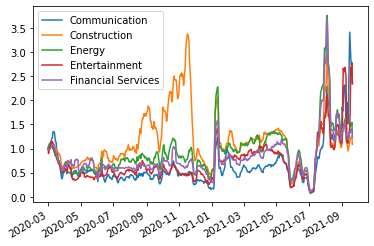

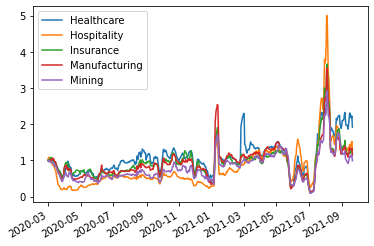

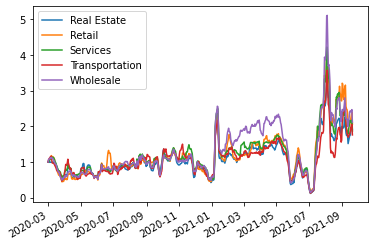

In [102]:
industry = industry.dropna(how='any',axis=0) 
industry['post_date'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in industry['post_date']]

i, j = 0,0
for ind in industry['industry'].unique():
    filtered_df = industry[industry['industry']==ind]    
    plt.plot(filtered_df['post_date'],filtered_df['count_id_indexed'], label = ind)
    
    j += 1
    if j >= 5:               
        plt.gcf().autofmt_xdate()
        plt.legend()
        plt.show()
        i +=1
        j = 0

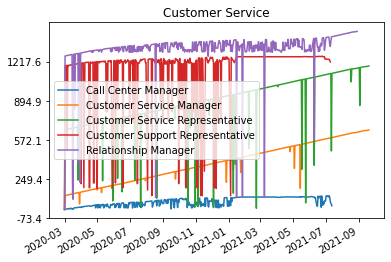

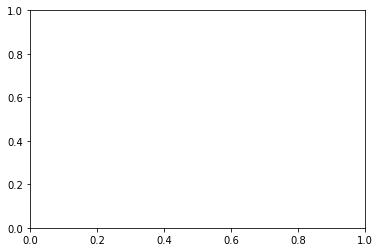

In [7]:
job_family_role = job_family_role.dropna(how='any',axis=0) 
job_family_role = job_family_role[~(job_family_role['count_id_indexed'] == "\\N")]
job_family_role['post_date'] = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in job_family_role['post_date']]
min_v = 10000
max_v = 0
fig, ax = plt.subplots()

for job_family in job_family_role['job_family'].unique():
    semifiltered_df = job_family_role[job_family_role['job_family']==job_family]    
    #plt.plot(filtered_df['post_date'],filtered_df['count_id_indexed'], label = job_family)
    i, j = 0,0
    
    for role in semifiltered_df['role'].unique():
        filtered_df = semifiltered_df[semifiltered_df['role']==role]
        #min_v = min(min_v,semifiltered_df['count_id_indexed'].astype(float).min())
        #max_v = max(max_v,semifiltered_df['count_id_indexed'].astype(float).max())
        #print(str([math.floor(min_v),math.ceil(max_v)]))
        #print(str(np.arange(math.floor(min_v), math.ceil(max_v), (math.ceil(max_v) - math.floor(min_v))/5)))

        #plt.yticks(np.arange(math.floor(min_v), math.ceil(max_v), (math.ceil(max_v) - math.floor(min_v))/5))
        ax.plot(filtered_df['post_date'],filtered_df['count_id_indexed'], label = (role))
        start, end = ax.get_ylim()
        ax.yaxis.set_ticks(np.arange(start, end, (end-start)/5))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        j += 1
        if (j >= 5) or (i*5+j >= len(semifiltered_df['role'].unique())):
            #print(str([math.floor(min_v),math.ceil(max_v)]))#+ " "+str(max_v) + " " +str(np.arange(min_v, max_v, (max_v - min_v)/2)) )
            #plt.yticks(np.arange(0, 15, 1))
            #plt.yaxis.set_major_locator(plt.MaxNLocator(3))
            #plt.locator_params(axis="y", nbins=2)
             
            plt.gcf().autofmt_xdate()
            plt.title(job_family)
            plt.legend()
            #

            plt.show()
            fig, ax = plt.subplots()

            i +=1
            j = 0
            min_v = 10000
            max_v = 0
            break
    break


In [162]:
import math
math.ceil(0.1)

1

In [143]:
min(10,11)

10

In [134]:
print(role)

Service Center Specialist


In [138]:
~(filtered_df['count_id_indexed'] == "\\N")

1094      False
3747      False
5088      False
6423      False
10043     False
          ...  
526796    False
528223    False
529518    False
536870    False
537842    False
Name: count_id_indexed, Length: 151, dtype: bool

In [4]:
combined = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(job_family, geography, on='post_date'),industry, on='post_date'),job_family_role, on='post_date'), geography_industry, on='post_date'), industry_job_family, on='post_date'), overall, on='post_date')

In [ ]:
print(combined)

Error: Session cannot generate requests

In [ ]:
combined.head()

Error: Session cannot generate requests

In [ ]:
combined.tail()

Error: Session cannot generate requests

In [ ]:
combined.describe()

In [ ]:
combined.info()